# Desafio House Rocket Company

**Contexto:**  
A House Rocket é uma plataforma digital de compra e venda de imóveis. Seu principal modelo de negócios baseia-se em adquirir propriedades a preços baixos, em localizações estratégicas, para revendê-las com lucro usando a tencologia ao seu favor. A tarefa será usar dados históricos de vendas de casas para identificar as melhores oportunidades e maximizar a receita da House Rocket.  
Os dados fornecem informações sobre casas vendidas entre Maio de 2014 e Maio de 2015, incluindo preços, localizações, atributos das propriedades e datas de venda.

**Perguntas de negócio:**  
- Quais casas o CEO da House Rocket deveria comprar e por qual preço?  
- Quando é o melhor momento para vender as casas adquiridas?  
- A House Rocket deveria investir em reformas? Se sim, quais mudanças aumentariam mais o valor da revenda?  

**Entendimento dos dados:**

| Coluna            | Descrição                                                                           |
|--------------------|-------------------------------------------------------------------------------------|
| id                | Identificação única da casa.                                                       |
| date              | Data da venda.                                                                     |
| price             | Preço da casa.                                                                     |
| bedrooms          | Número de quartos.                                                                 |
| bathrooms         | Número de banheiros.                                                               |
| sqft_living       | Área habitável em pés quadrados.                                                   |
| sqft_lot          | Tamanho do terreno em pés quadrados.                                               |
| floors            | Número de andares.                                                                 |
| waterfront        | Indicador de proximidade à água (0 = não, 1 = sim).                                |
| view              | Qualidade da vista                                                                 |
| Grade             | Classificação da qualidade de construção (1-13).                                   |
| Condition         | condição física geral do imóvel                                                    |
| sqft_above        | pés quadrados_acima                                                                |
| sqft_basement	    | porão de pés quadrados                                                             |       
| yr_built          | Ano de construção.                                                                 |
| yr_renovated      | Ano de renovação (0 se nunca foi renovada).                                        |
| zipcode           | CEP da localização.                                                                |
| lat, long         | Coordenadas geográficas.                                                           |
| sqft_living15     | Área habitável de 15 vizinhos próximos, em pés quadrados.                          |
| sqft_lot15        | Área do terreno de 15 vizinhos próximos, em pés quadrados.                         |


## Bibliotecas

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kstest, probplot

# Carregamento dos dados

In [6]:
# Carregando os dados
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# quantidades de linhas e colunas
df.shape

(21613, 21)

In [8]:
# tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Limpeza dos dados

In [10]:
# analisar se possuem valores duplicatos e ausentes
print("Número de linhas duplicadas:")
print(df.duplicated().sum())

print("Valores ausentes por coluna:")
print(df.isnull().sum())


Número de linhas duplicadas:
0
Valores ausentes por coluna:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


### Converter a coluna 'date' para o formato datetime 
O módulo datetime em Python é usado para manipular datas e horários, permitindo cálculos, formatações e análises temporais.


In [17]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df['date'] = df['date'].dt.strftime('%d-%m-%Y')
print(df['date'].head())



0    13-10-2014
1    09-12-2014
2    25-02-2015
3    09-12-2014
4    18-02-2015
Name: date, dtype: object


### Categorizar `sqft_basement` como "Com Porão" e "Sem Porão" e Arredondar a variável `bathrooms`

In [11]:
df['has_basement'] = np.where(df['sqft_basement'] > 0, 'Com Porão', 'Sem Porão')
df['bathrooms'] = np.floor(df['bathrooms']).astype(int)
print(df[['bathrooms', 'sqft_basement', 'has_basement']].head())


   bathrooms  sqft_basement has_basement
0          1              0    Sem Porão
1          2            400    Com Porão
2          1              0    Sem Porão
3          3            910    Com Porão
4          2              0    Sem Porão


### Excluindo a variável id por não ser relevante para as análises

In [21]:
df.drop(['id'], axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,13-10-2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,09-12-2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,25-02-2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,09-12-2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,18-02-2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# EDA - Exploratory Data Analysis ( Exploração dos Dados )

In [14]:
# Estastíca descritiva
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Distribuição dos Dados
Analisar como os dados estão distribuídos permitindo identificar padrões gerais e possíveis assimetrias nas variáveis.

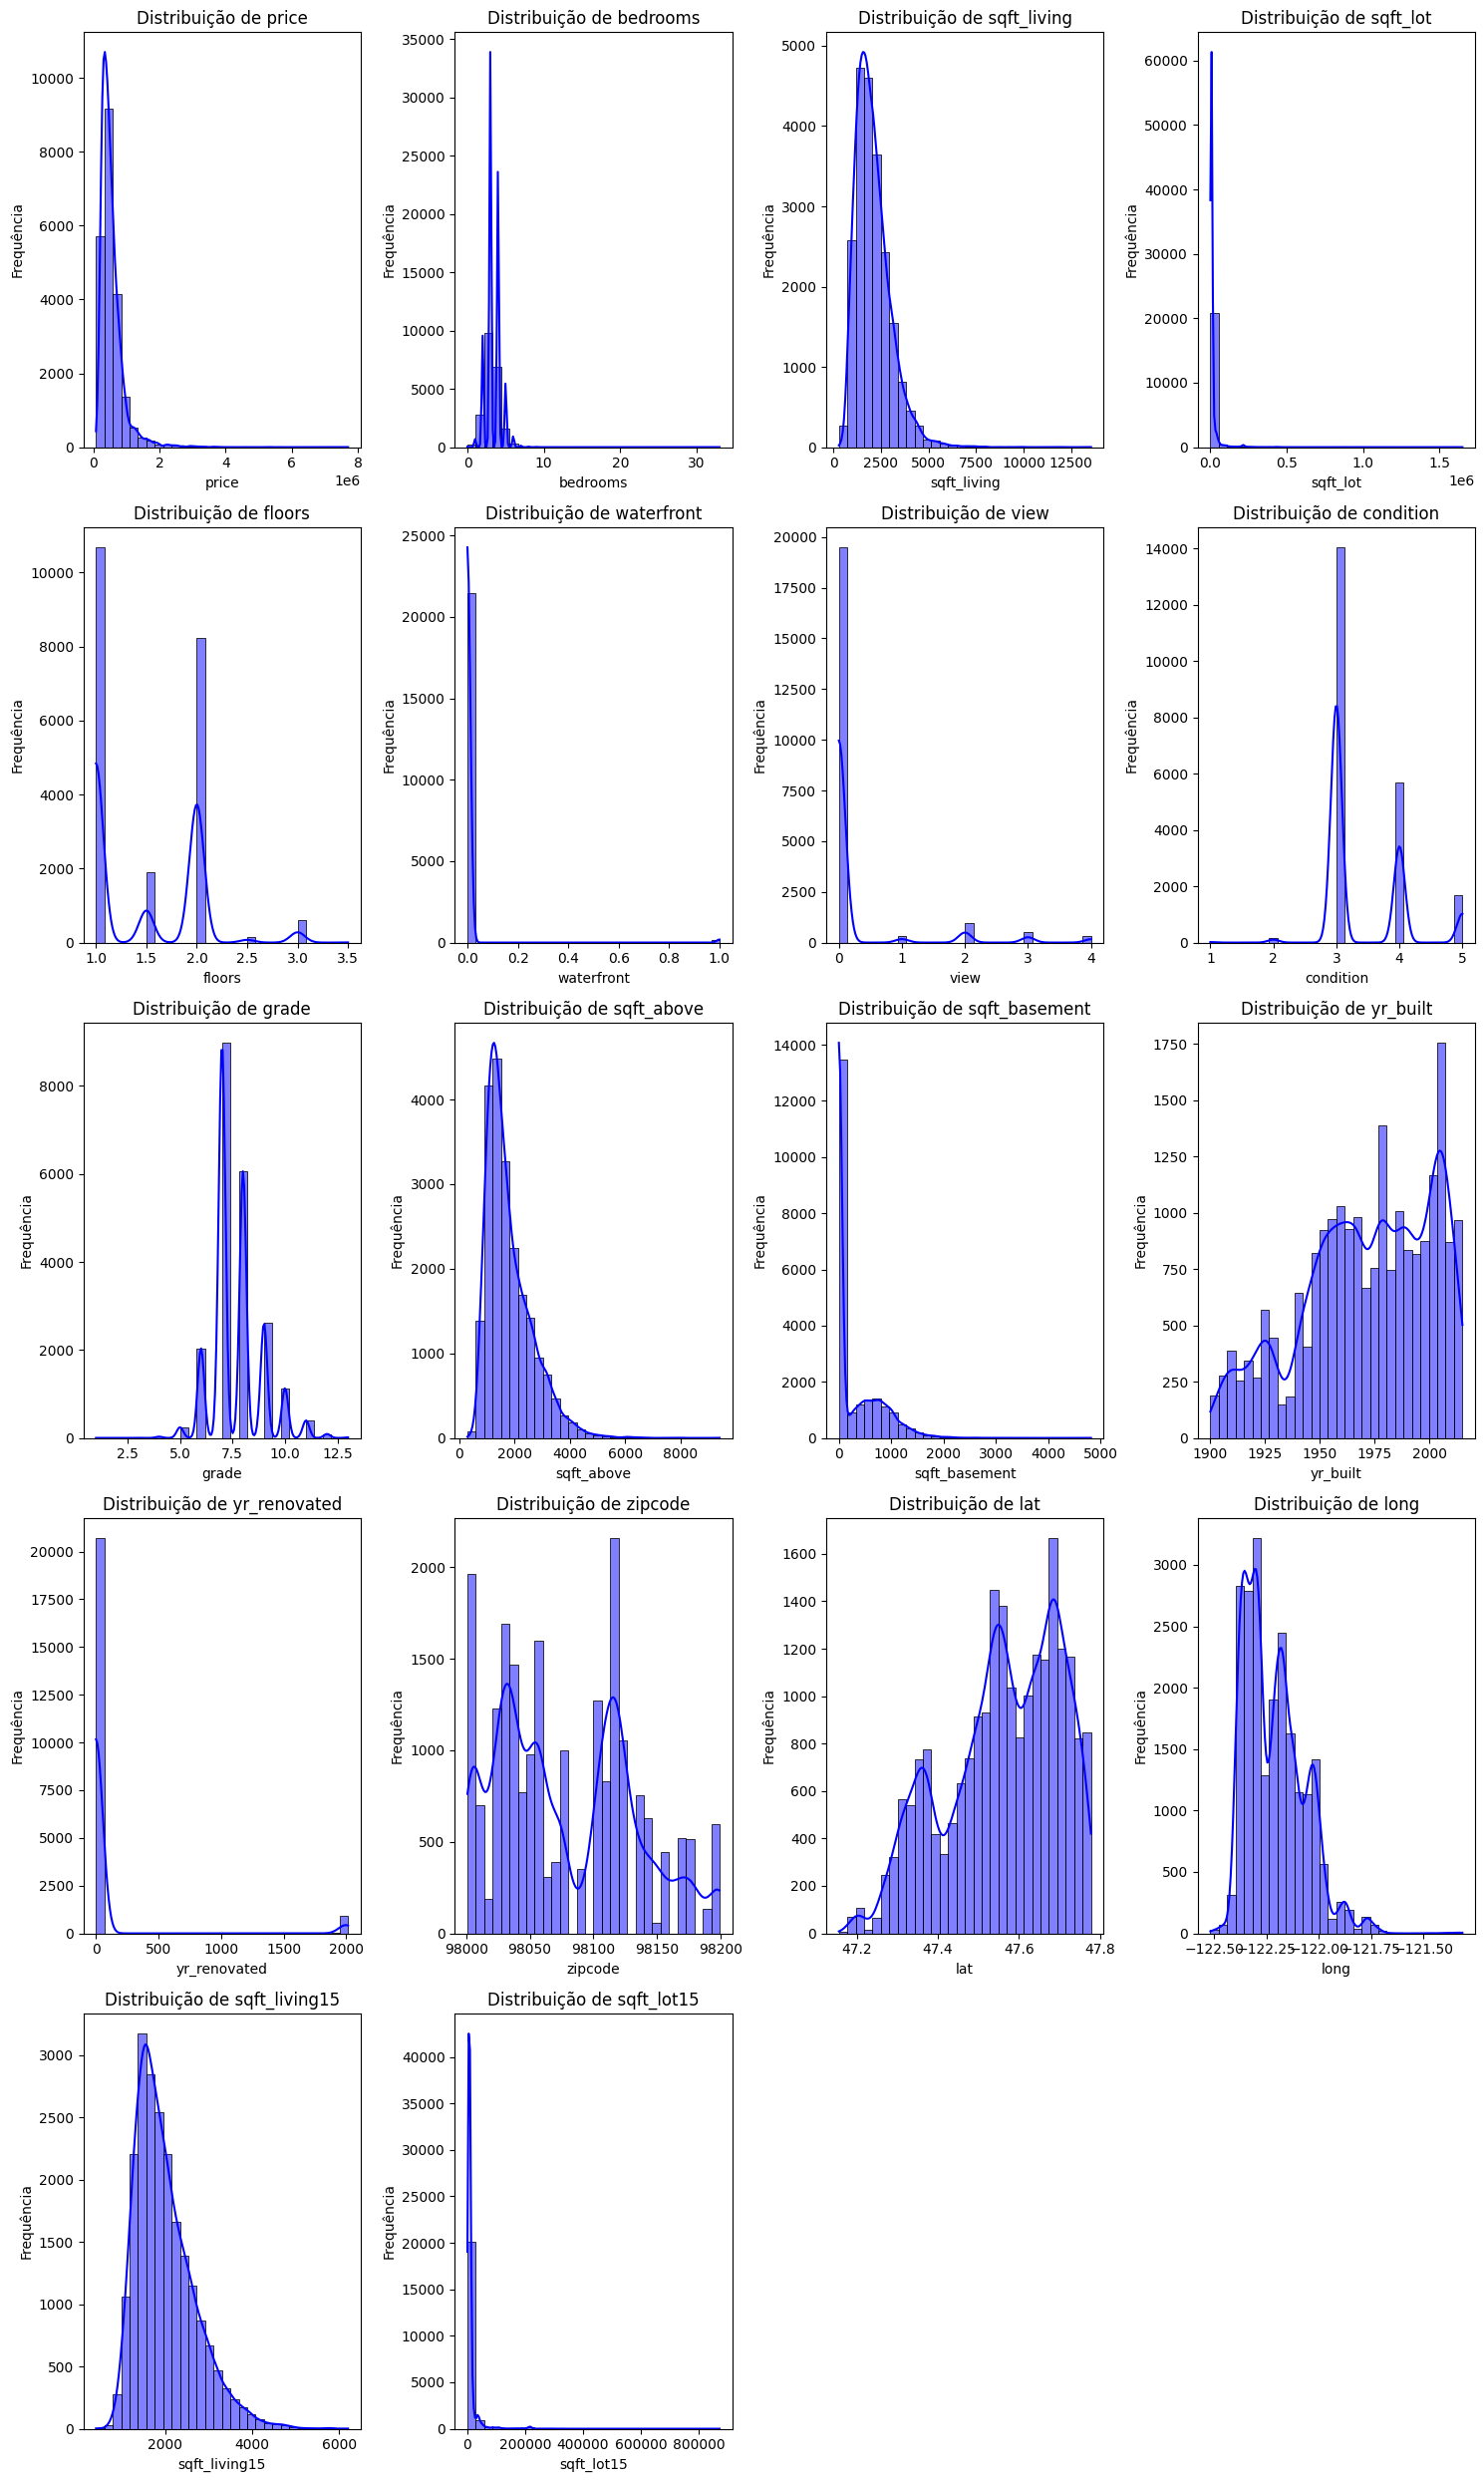

In [16]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular o número de linhas e colunas necessárias para o layout
n_columns = 4
n_rows = math.ceil(len(numerical_columns) / n_columns)

# Configurar o tamanho da figura
plt.figure(figsize=(15, 5 * n_rows))

# Gerar um gráfico de distribuição para cada coluna
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_columns, i)  # Ajuste automático de linhas e colunas
    sns.histplot(df[column], kde=True, bins=30, color='blue')  # histograma e KDE
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()



Os gráficos mostram que a maioria das casas tem características típicas: 3 quartos, 2 banheiros, área habitável entre 1.000 e 3.000 sqft, e área do lote entre 5.000 e 15.000 sqft. O preço das casas varia bastante, com uma concentração em valores mais baixos e uma cauda longa à direita, indicando a presença de imóveis muito caros. A maioria das casas foi construída entre 1950 e 2000, e poucas foram renovadas.

A qualidade das casas (grade) está concentrada entre 7 e 8, e a condição geral é 3 ou 4 (em uma escala de 1 a 5). Poucas casas têm vista para a água (waterfront) ou vistas privilegiadas (view). A localização geográfica é bastante específica, com as casas concentradas em uma faixa estreita de latitude e longitude, sugerindo uma região bem definida, como a área de Seattle.

### Transformação Logarítimica
A transformação logarítmica é uma técnica matemática aplicada aos dados para reduzir escalas e comprimir valores, tornando-os mais manejáveis e menos dispersos. Foi aplicada às variáveis price, sqft_living e sqft_lot para reduzir o impacto de valores altos e melhorar a simetria das distribuições.\]ument}


In [18]:
df['log_price'] = np.log1p(df['price'])  # Para o preço
df['log_sqft_living'] = np.log1p(df['sqft_living'])  # Para a área habitável
df['log_sqft_lot'] = np.log1p(df['sqft_lot'])  # Para o tamanho do terreno

# Visualizar as primeiras linhas para verificar as novas variáveis
print(df[['log_price', 'log_sqft_living', 'log_sqft_lot']].head())


   log_price  log_sqft_living  log_sqft_lot
0  12.309987         7.074117      8.639588
1  13.195616         7.852050      8.887791
2  12.100718         6.647688      9.210440
3  13.311331         7.581210      8.517393
4  13.142168         7.427144      8.997271



Analisando log_price:
Transformada (log_price): p-valor = 0.0000


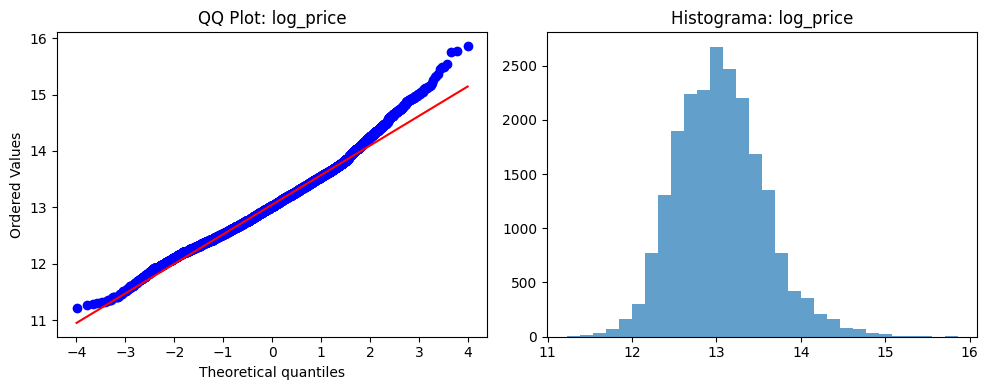


Analisando log_sqft_living:
Transformada (log_sqft_living): p-valor = 0.0000


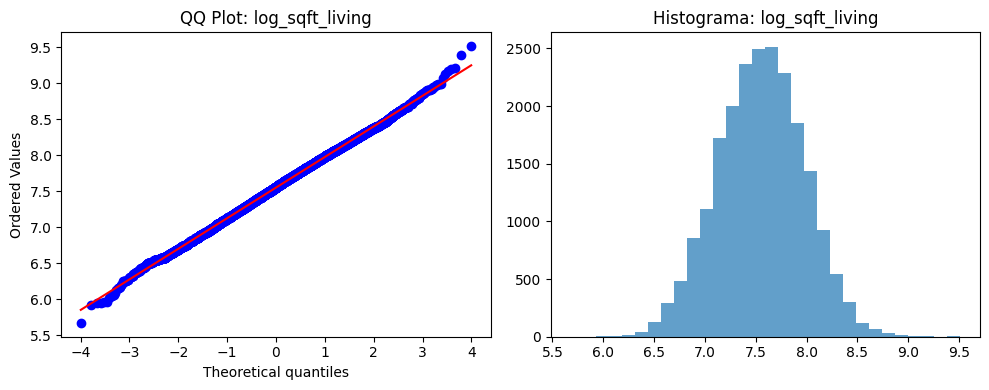


Analisando log_sqft_lot:
Transformada (log_sqft_lot): p-valor = 0.0000


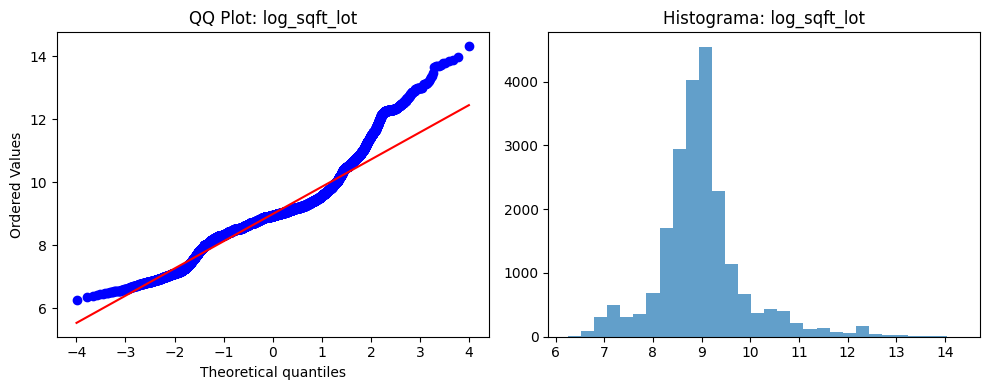

In [35]:
# Lista das variáveis transformadas
variaveis_transformadas = ['log_price', 'log_sqft_living', 'log_sqft_lot']

for coluna in variaveis_transformadas:
    print(f"\nAnalisando {coluna}:")

    # Teste Kolmogorov-Smirnov para a variável transformada
    stat_trans, p_trans = kstest(df[coluna], 'norm', N=5000)
    print(f"Transformada ({coluna}): p-valor = {p_trans:.4f}")

    # Visualizações
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    probplot(df[coluna], dist="norm", plot=axes[0])
    axes[0].set_title(f"QQ Plot: {coluna}")
    axes[1].hist(df[coluna], bins=30, alpha=0.7)
    axes[1].set_title(f"Histograma: {coluna}")
    plt.tight_layout()
    plt.show()


### **Relatório sobre a Transformação Logarítmica**

A transformação logarítmica foi aplicada às variáveis `price`, `sqft_living` e `sqft_lot` com o intuito de melhorar a qualidade da análise dos dados. Essas variáveis apresentavam distribuições bastante enviesadas (assimétricas), com valores extremos que dificultavam a visualização e a interpretação. O logaritmo, ao comprimir a escala dos dados, reduziu a influência de outliers, tornando as distribuições mais gerenciáveis e próximas de uma forma simétrica.

#### **Impacto da Transformação**
1. **Preço (`log_price`):**
   A variável `price`, que variava de `$75.000` a `$7.700.000`, foi transformada de forma a reduzir o impacto de propriedades extremamente caras, como casas de luxo. Após a transformação, a distribuição ficou mais simétrica e adequada para análises, embora os outliers ainda estejam presentes, como mostrado no QQ Plot. Apesar disso, o histograma resultante demonstra que os dados transformados são mais equilibrados, permitindo uma análise mais clara do mercado geral.

2. **Área útil (`log_sqft_living`):**
   A variável `sqft_living` foi transformada de maneira eficiente, resultando em uma distribuição que se alinha bem à normalidade, conforme observado no histograma e no QQ Plot. Isso sugere que a transformação logarítmica foi particularmente eficaz para essa variável, permitindo insights mais precisos sobre a área habitável das propriedades.

3. **Tamanho do terreno (`log_sqft_lot`):**
   A variável `sqft_lot`, por sua natureza e alta variabilidade (de 520 a 1.651.359 pés²), apresentou uma melhoria menos significativa após a transformação logarítmica. Embora a distribuição tenha se tornado mais compacta, ela ainda apresenta um leve viés à direita, refletindo a presença de terrenos extremamente grandes que continuam a influenciar a análise. Isso foi evidenciado pelo desvio nos extremos no QQ Plot.

#### **Análise Estatística**
Os testes de normalidade (Kolmogorov-Smirnov) indicaram p-valores baixos (0.0000), rejeitando formalmente a hipótese de normalidade. Isso ocorre principalmente devido ao tamanho do conjunto de dados (>5000 observações) e à persistência de outliers. No entanto, visualmente, os histogramas e QQ Plots mostram que as transformações logarítmicas foram bem-sucedidas em aproximar as distribuições de uma forma simétrica, o que é geralmente suficiente para análises exploratórias e insights.

#### **Conclusão**
A transformação logarítmica foi uma decisão acertada. Ela tornou os dados mais manejáveis e reduziu significativamente os efeitos de valores extremos. Isso é particularmente útil para análises descritivas e visualizações que buscam entender padrões gerais no mercado imobiliário.

### Normalização Min-Max Scaling
Essa normalização está ajustado para uma escala de 0 a 1, é complementar à transformação logarítmica, que foi utilizada para ajustar distribuições enviesadas e reduzir o impacto de outliers. Isso facilita a comparação entre variáveis com magnitudes muito diferentes, como área habitável (sqft_living) e tamanho do terreno (sqft_lot).

In [40]:
scaler = MinMaxScaler()

# Aplicar a normalização nas variáveis
df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']] = scaler.fit_transform(
    df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]
)

# Verificar os valores normalizados
print(df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']].head())




   sqft_living  sqft_lot  sqft_above  sqft_basement  sqft_living15  sqft_lot15
0     0.067170  0.003108    0.097588       0.000000       0.161934    0.005742
1     0.172075  0.004072    0.206140       0.082988       0.222165    0.008027
2     0.036226  0.005743    0.052632       0.000000       0.399415    0.008513
3     0.126038  0.002714    0.083333       0.188797       0.165376    0.004996
4     0.104906  0.004579    0.152412       0.000000       0.241094    0.007871


### Visualizar (antes e depois das transformações)

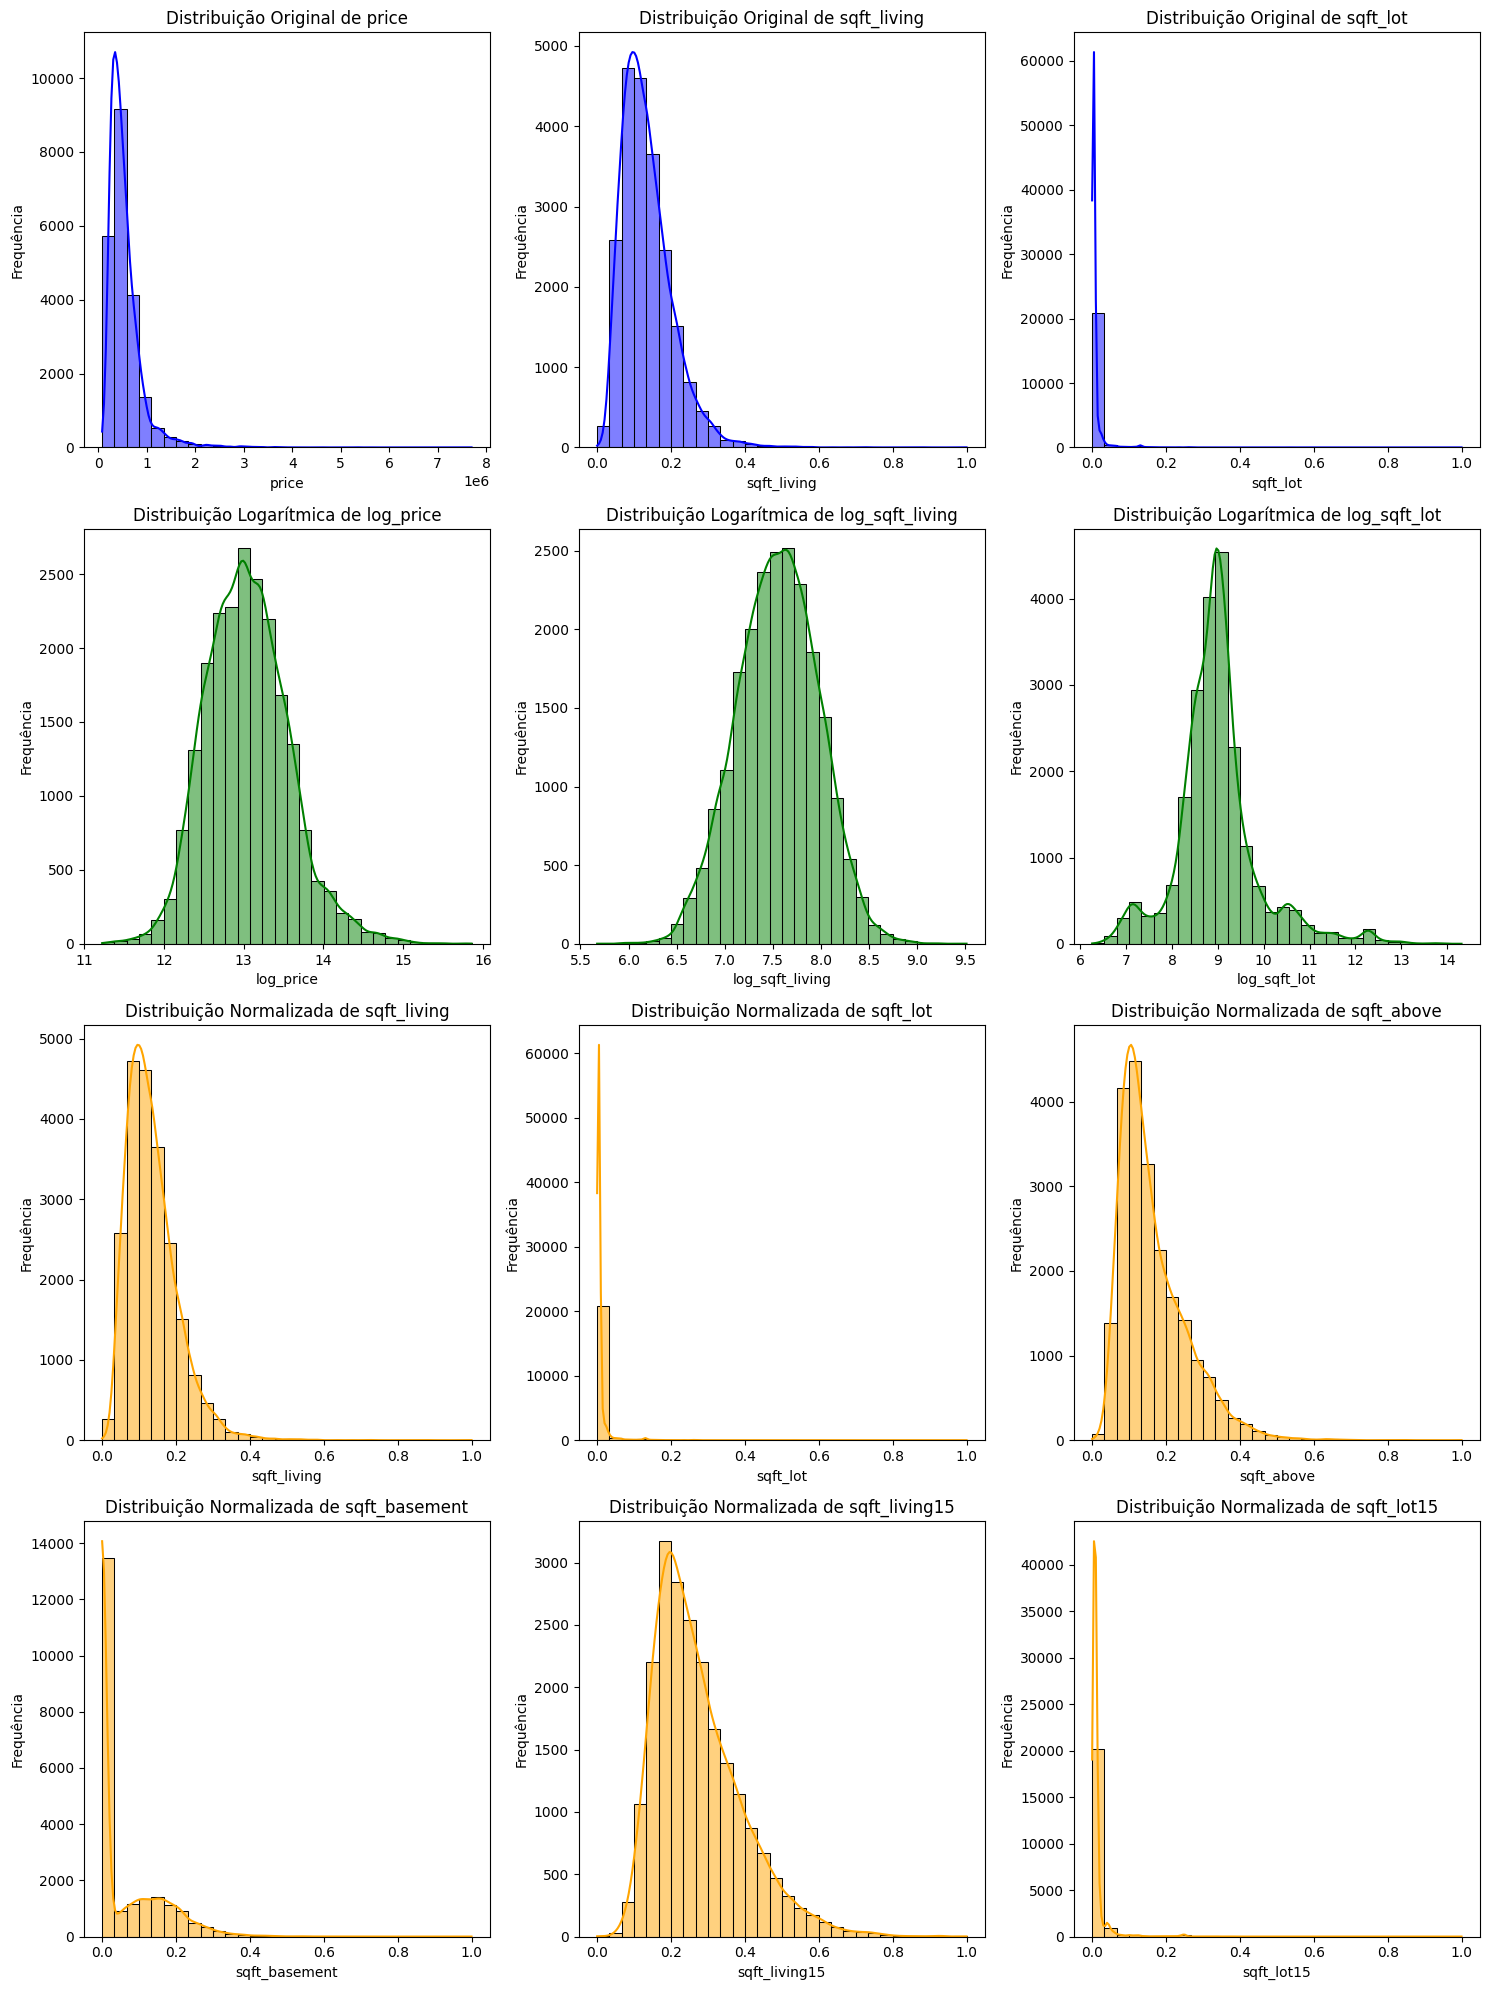

In [43]:
columns_original = ['price', 'sqft_living', 'sqft_lot']
columns_log_transformed = ['log_price', 'log_sqft_living', 'log_sqft_lot']
columns_normalized = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

# Configurar o número total de subgráficos
n_total_plots = len(columns_original) + len(columns_log_transformed) + len(columns_normalized)
n_columns = 3  # Número fixo de colunas
n_rows = math.ceil(n_total_plots / n_columns)  # Número de linhas ajustado

# Configurar o tamanho da figura
plt.figure(figsize=(15, 5 * n_rows))

# Visualizar a distribuição original
for i, column in enumerate(columns_original, 1):
    plt.subplot(n_rows, n_columns, i)
    sns.histplot(df[column], kde=True, color='blue', bins=30)
    plt.title(f'Distribuição Original de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')

# Visualizar a distribuição logarítmica
for i, column in enumerate(columns_log_transformed, 1):
    plt.subplot(n_rows, n_columns, i + len(columns_original))
    sns.histplot(df[column], kde=True, color='green', bins=30)
    plt.title(f'Distribuição Logarítmica de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')

# Visualizar a distribuição normalizada
for i, column in enumerate(columns_normalized, 1):
    plt.subplot(n_rows, n_columns, i + len(columns_original) + len(columns_log_transformed))
    sns.histplot(df[column], kde=True, color='orange', bins=30)
    plt.title(f'Distribuição Normalizada de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')

# Ajustar o layout
plt.tight_layout()
plt.show()


### **Relatório e Análise da Normalização**

---

#### **Objetivo da Normalização**
A normalização foi aplicada às variáveis `sqft_living`, `sqft_lot`, `sqft_above`, `sqft_basement`, `sqft_living15` e `sqft_lot15` com o propósito de ajustar os valores para uma escala uniforme entre 0 e 1. O objetivo era facilitar comparações entre variáveis que possuem escalas muito diferentes e torná-las mais intuitivas para análise e visualização.

---

#### **Resultados da Normalização**
1. **Escala Uniforme:**
   - Todas as variáveis foram ajustadas para o intervalo [0, 1], onde:
     - O valor 0 representa o menor valor no conjunto de dados.
     - O valor 1 representa o maior valor no conjunto de dados.
   - Isso elimina diferenças de magnitude entre variáveis, como `sqft_lot` (valores muito altos) e `sqft_basement` (valores geralmente baixos).

2. **Preservação da Forma da Distribuição:**
   - A normalização não alterou a forma original das distribuições, ou seja, variáveis com enviesamento continuam enviesadas, e variáveis mais simétricas permanecem simétricas.
   - Isso garante que as características estatísticas dos dados originais sejam mantidas.

3. **Facilidade de Comparação:**
   - Com a normalização, variáveis com escalas muito diferentes agora podem ser comparadas diretamente, tanto em análises exploratórias quanto em visualizações.

---

#### **Análise Geral**
A normalização foi uma escolha adequada para este caso, pois:
- **Não altera as relações entre os valores das variáveis.**
- **Permite análises comparativas mais claras e intuitivas**, especialmente em cenários onde múltiplas variáveis estão sendo analisadas simultaneamente.

Essa transformação é particularmente útil para gráficos comparativos e cálculos que dependem de escalas uniformes, sem modificar a essência dos dados. Para análises mais descritivas (como entender os valores reais), as variáveis originais podem ser usadas em conjunto com os dados normalizados.

In [45]:
# Criando o novo DataFrame df_tranf com as variáveis transformadas
df_tranf = df.copy()

### Outliers

In [48]:
# Identificar colunas com outliers usando IQR no DataFrame df_tranf
columns_com_outliers = [
    column for column in df_tranf.select_dtypes(include=np.number).columns
    if ((df_tranf[column] < (df_tranf[column].quantile(0.25) - 1.5 * (df_tranf[column].quantile(0.75) - df_tranf[column].quantile(0.25)))) |
        (df_tranf[column] > (df_tranf[column].quantile(0.75) + 1.5 * (df_tranf[column].quantile(0.75) - df_tranf[column].quantile(0.25))))).any()
]

print(f"Colunas com outliers: {columns_com_outliers}")

Colunas com outliers: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price', 'log_sqft_living', 'log_sqft_lot']


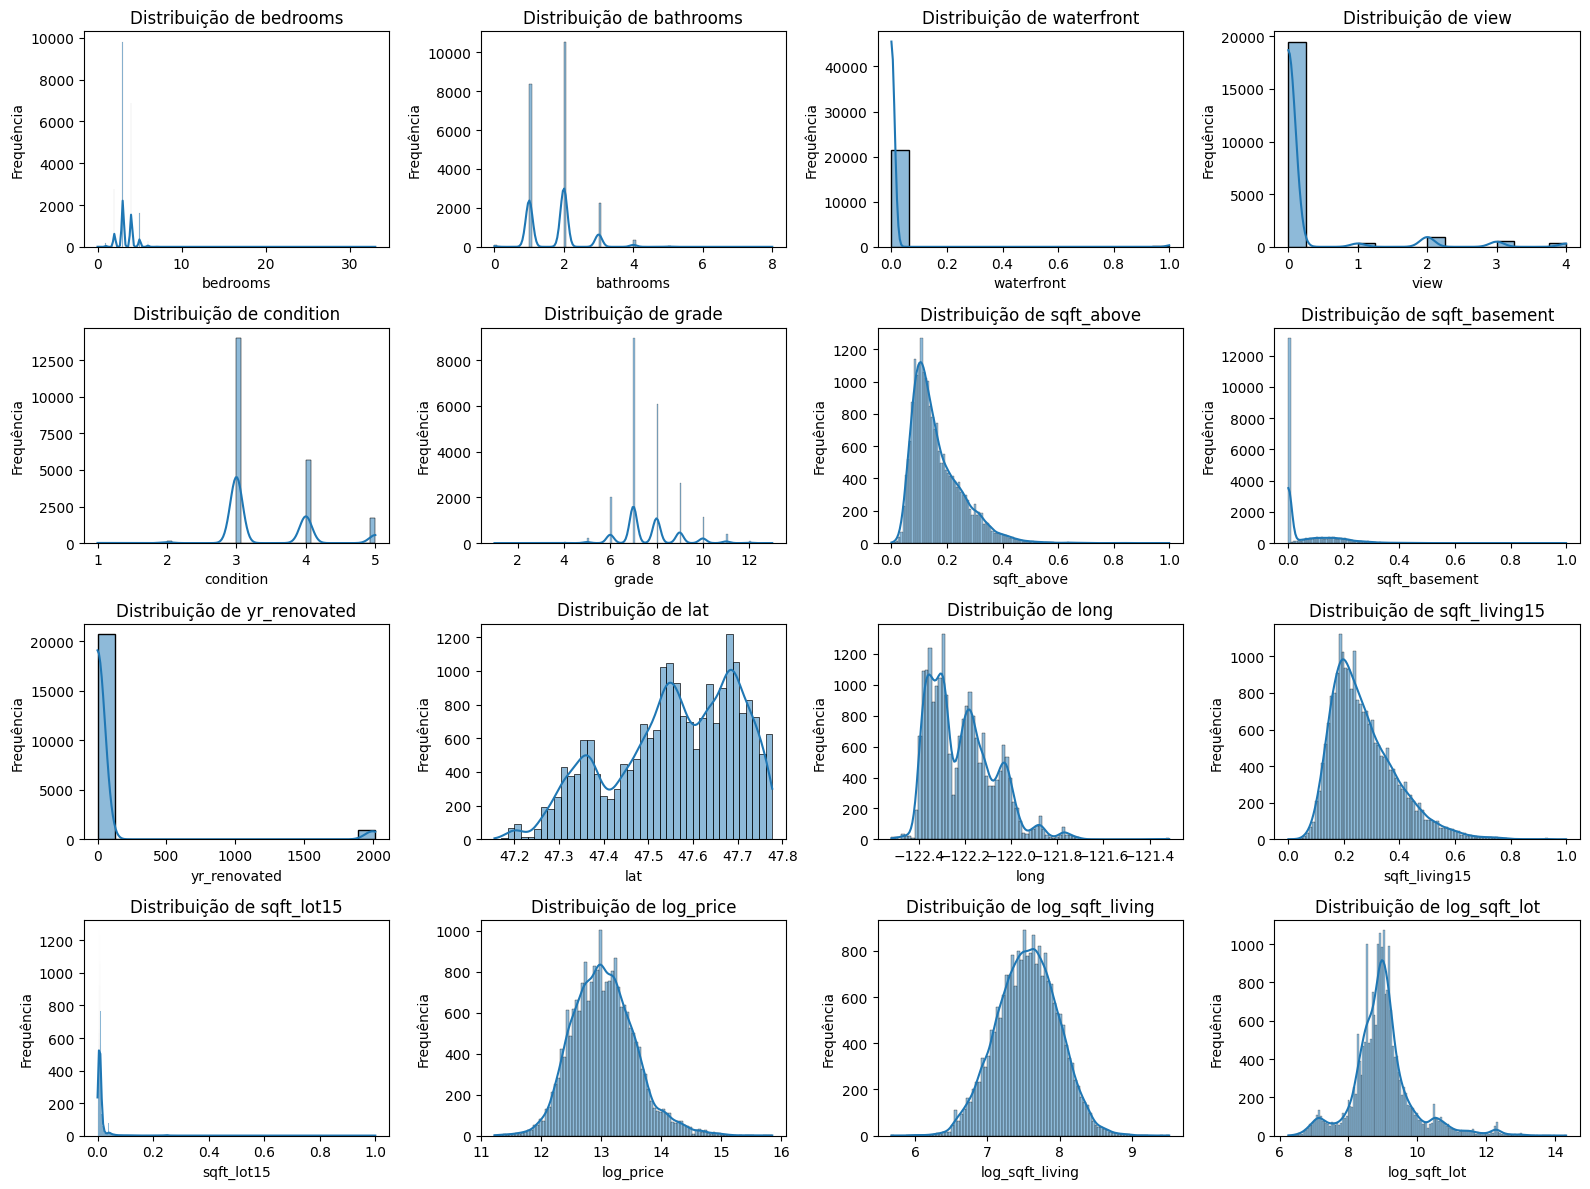

In [49]:
# Visualização das colunas com outliers
columns_com_outliers = ['bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
                        'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price', 'log_sqft_living', 'log_sqft_lot']

plt.figure(figsize=(16, 12))

# Gerar histogramas para cada coluna com distribuição
for i, column in enumerate(columns_com_outliers, 1):
    plt.subplot(4, 4, i) 
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.tight_layout()

plt.show()


In [50]:
# Filtrar o DataFrame para encontrar casas com 33 quartos
casas_com_33_quartos = df_tranf[df_tranf['bedrooms'] == 33]

# Exibir as casas que têm exatamente 33 quartos
print(casas_com_33_quartos[['price', 'bedrooms', 'bathrooms', 'sqft_lot15']])


          price  bedrooms  bathrooms  sqft_lot15
15870  640000.0        33          1    0.004651


In [54]:
# Filtrar casas com 8 banheiros
casas_com_8_banheiros = df_tranf[df_tranf['bathrooms'] == 8]

# Exibir as casas com 8 banheiros e suas características (preço, quartos, terreno, etc.)
print(casas_com_8_banheiros[['price', 'bedrooms', 'bathrooms', 'sqft_lot15']])


           price  bedrooms  bathrooms  sqft_lot15
7252   7700000.0         6          8    0.009361
12777  2280000.0         7          8    0.249439


In [55]:
# Calcular o IQR para 'bedrooms'
Q1 = df_tranf['bedrooms'].quantile(0.25)
Q3 = df_tranf['bedrooms'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover os outliers de 'bedrooms'
df_tranf = df_tranf[(df_tranf['bedrooms'] >= limite_inferior) & (df_tranf['bedrooms'] <= limite_superior)]

# Exibir as primeiras linhas do novo DataFrame sem outliers
df_tranf.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,log_price,log_sqft_living,log_sqft_lot
0,13-10-2014,221900.0,3,1,0.067170,0.003108,1.0,0,0,3,...,0,98178,47.5112,-122.257,0.161934,0.005742,Sem Porão,12.309987,7.074117,8.639588
1,09-12-2014,538000.0,3,2,0.172075,0.004072,2.0,0,0,3,...,1991,98125,47.7210,-122.319,0.222165,0.008027,Com Porão,13.195616,7.852050,8.887791
2,25-02-2015,180000.0,2,1,0.036226,0.005743,1.0,0,0,3,...,0,98028,47.7379,-122.233,0.399415,0.008513,Sem Porão,12.100718,6.647688,9.210440
3,09-12-2014,604000.0,4,3,0.126038,0.002714,1.0,0,0,5,...,0,98136,47.5208,-122.393,0.165376,0.004996,Com Porão,13.311331,7.581210,8.517393
4,18-02-2015,510000.0,3,2,0.104906,0.004579,1.0,0,0,3,...,0,98074,47.6168,-122.045,0.241094,0.007871,Sem Porão,13.142168,7.427144,8.997271


## Identificação de outliers com IQR

Neste processo, focamos na **identificação e remoção dos outliers** em várias variáveis do DataFrame **`df_tranf`** para melhorar a qualidade da análise.

Utilizamos o **método do intervalo interquartil (IQR)** para identificar as colunas com valores extremos. A única variável com **valores extremos** foi **`bedrooms`**, que apresentou um número de **33 quartos**, considerado um outlier.

Quanto às outras variáveis com valores elevados, como **`log_price`**, que indica um preço elevado, e **`bathrooms`**, que apresentou imóveis com até **8 banheiros**, esses valores fazem sentido e representam **imóveis de luxo** ou **propriedades especiais**, e, portanto, não foram considerados outliers.

Por fim, **somente os outliers em `bedrooms` foram removidos**, ajustando o DataFrame para uma análise mais precisa, sem comprometer a integridade dos dados relacionados a outras variáveis de alto valor.

Essas ações garantem que a análise permaneça **representativa e sem distorções**, considerando as características reais dos imóveis.

### Correlações

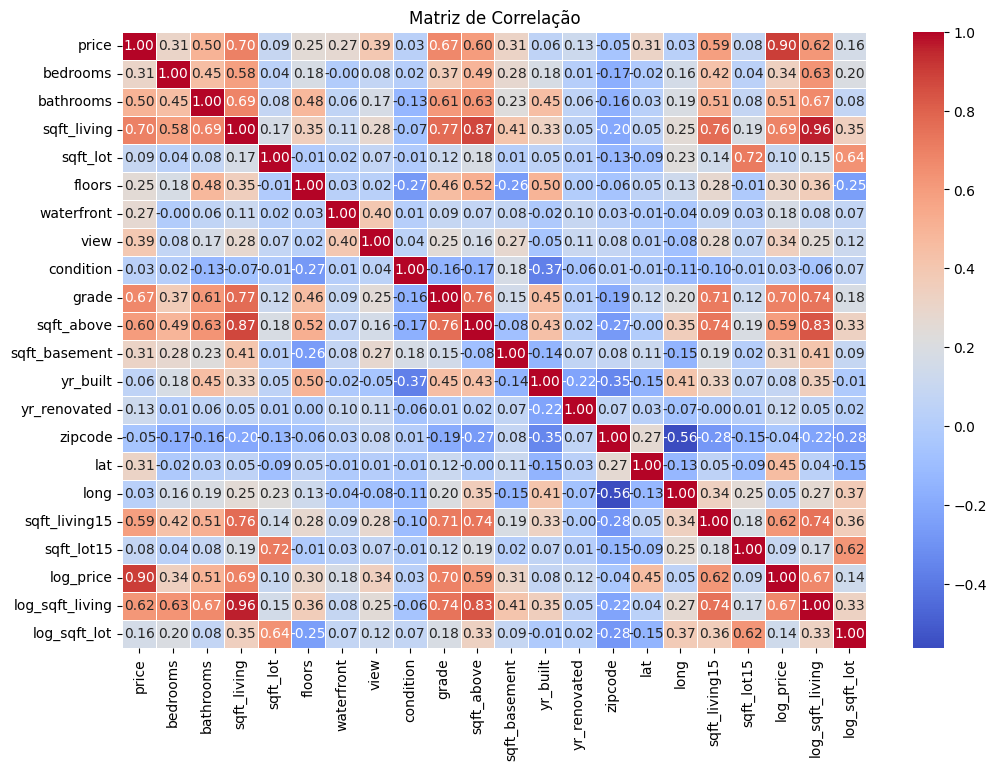

In [66]:
# Remover as colunas 'date' e 'has_basement' da análise
df_corr = df_tranf.drop(['date', 'has_basement'], axis=1)

# Calcular a matriz de correlação
correlation_matrix = df_corr.corr()

# Visualizar como heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_tranf.drop(['date', 'has_basement'], axis=1).corr(), 
            cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


### Relatório de Análise de Correlação das Variáveis

A matriz de correlação revela como as variáveis do conjunto de dados se relacionam entre si, permitindo identificar os principais fatores que influenciam o preço dos imóveis. Com base nos resultados, observamos que algumas variáveis têm relações mais fortes com o preço, enquanto outras desempenham um papel menor ou indireto.

Uma das correlações mais significativas é entre `sqft_living` (área útil) e `log_price`, com um coeficiente de 0,74. Isso indica que imóveis com áreas maiores tendem a ser mais caros, um padrão esperado no mercado imobiliário. Outra variável fortemente relacionada ao preço é `grade`, que representa a qualidade da construção, com uma correlação de 0,76. Isso reflete que imóveis com acabamentos e materiais de melhor qualidade são mais valorizados. Variáveis como `sqft_above` (área acima do solo) e `sqft_living15` (área útil média das casas vizinhas) também apresentam correlações fortes com o preço, mostrando que tanto o tamanho do imóvel quanto o contexto da vizinhança são fatores determinantes no valor de mercado.

Por outro lado, variáveis como `view` (qualidade da vista) e `waterfront` (proximidade à água) possuem correlações mais moderadas com o preço, em torno de 0,25 e 0,23, respectivamente. Isso sugere que, embora uma boa vista ou proximidade com a água possam agregar valor, esses fatores não são tão determinantes quanto o tamanho ou a qualidade do imóvel. Além disso, a variável `yr_built` (ano de construção) apresenta uma correlação negativa de -0,22 com o preço, indicando que imóveis mais antigos tendem a ser um pouco menos valiosos, possivelmente devido à necessidade de reformas ou à preferência por construções mais modernas.

Finalmente, fatores geográficos como latitude e longitude apresentam correlações fracas, com valores próximos de zero, sugerindo que a localização geral pode ter menos impacto direto quando comparada com características específicas do imóvel ou do bairro. No entanto, isso pode refletir padrões regionais mais amplos que não estão capturados diretamente pela matriz de correlação.

Em resumo, o preço de um imóvel é amplamente influenciado por variáveis físicas, como tamanho e qualidade, enquanto fatores contextuais, como localização e características ambientais, desempenham papéis complementares, mas menos impactantes. Essa análise destaca a importância de combinar aspectos intrínsecos e extrínsecos do imóvel para entender sua precificação no mercado.

# Característica de Mercado

### Análise Geográfica

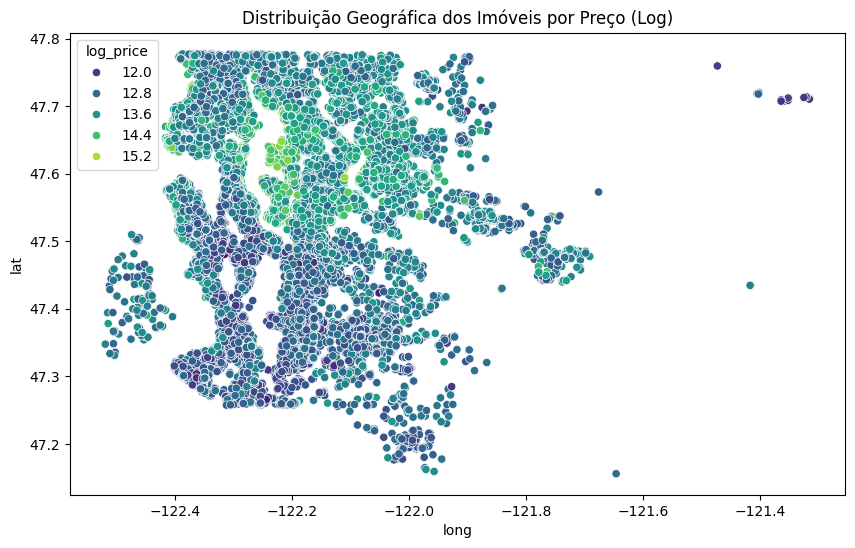

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tranf, x='long', y='lat', hue='log_price', palette='viridis')
plt.title("Distribuição Geográfica dos Imóveis por Preço (Log)")
plt.show()


Este gráfico nos fornece uma visão clara de como os preços dos imóveis estão distribuídos espacialmente, permitindo identificar áreas de maior e menor valor. A distribuição indica uma forte influência da localização geográfica no valor dos imóveis, com concentrações de preços mais altos em determinadas regiões.

1. **Áreas de Maior Valor:**
   - Os imóveis com os preços mais altos (tons de verde) estão centralizados, próximos ao núcleo do gráfico. Isso sugere que essas áreas, geograficamente centralizadas, possuem maior valorização, possivelmente devido à proximidade de infraestrutura, serviços ou atratividade da região.
   - Imóveis em tons de verde indicam que o mercado imobiliário premium está localizado em áreas específicas e não distribuído de forma homogênea.

2. **Áreas de Menor Valor:**
   - Os pontos em azul, representando os preços mais baixos, estão mais dispersos, geralmente nas regiões periféricas do gráfico.
   - Isso indica que áreas mais afastadas, tanto ao norte quanto ao sul e ao extremo leste, possuem imóveis com menor valorização. Essas regiões podem ser menos acessíveis ou ter menor demanda.

3. **Concentração de Imóveis:**
   - Existe uma alta densidade de pontos em algumas áreas centrais e próximas à costa (longitude mais negativa e latitude média). Isso reflete uma concentração de imóveis em regiões urbanas, onde o mercado imobiliário é mais ativo.
   - Por outro lado, áreas mais esparsas, como as extremidades, possuem menor densidade de imóveis, indicando zonas menos urbanizadas ou áreas predominantemente rurais.

4. **Influência da Geografia:**
   - A proximidade com a água pode ser um fator importante para o preço, visto que os imóveis mais próximos das regiões litorâneas (longitude mais negativa) tendem a apresentar maior valorização.
   - Regiões no interior (longitude mais positiva) parecem ter imóveis com preços menores, indicando um impacto da localização no mercado imobiliário.

---

### **Insights Extraídos**
- **Localização é o Principal Determinante do Preço:**
   - O gráfico confirma que o valor dos imóveis está fortemente relacionado à localização geográfica, com preços mais altos em áreas centrais e próximas a pontos de interesse, como a água ou centros urbanos.

- **Segmentação do Mercado:**
   - O mercado imobiliário pode ser segmentado em regiões de alto valor (central e costeira) e regiões de baixo valor (periféricas). Essa segmentação pode ajudar a identificar oportunidades de investimento e desenvolvimento.

- **Valorização Regional:**
   - Imóveis em regiões altamente valorizadas podem justificar maiores preços devido a fatores como acessibilidade, infraestrutura ou atratividade natural. Regiões menos valorizadas podem oferecer oportunidades para desenvolvimentos futuros.

---

### **Conclusão**
Este gráfico destaca a importância da localização no mercado imobiliário. As regiões centrais e costeiras concentram os imóveis de maior valor, enquanto áreas periféricas ou afastadas têm preços significativamente menores. Esses padrões reforçam o impacto de fatores como infraestrutura, acessibilidade e proximidade com a água no valor dos imóveis. Análises adicionais, como cruzamento com outras variáveis (ex.: qualidade da construção ou proximidade com pontos turísticos), podem ajudar a detalhar ainda mais os fatores que influenciam os preços em cada região.

### Observar as preferências e características mais valorizadas pelos compradores de imóveis

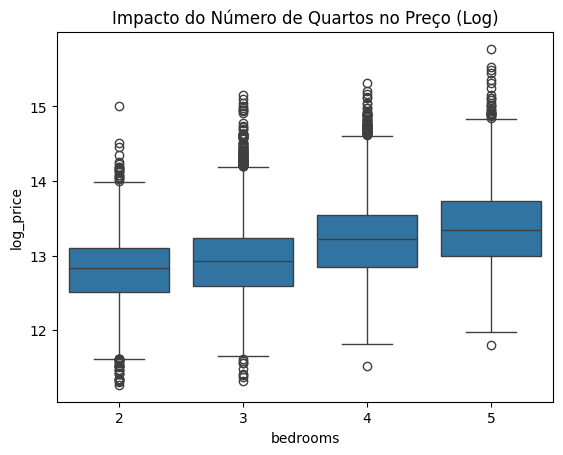

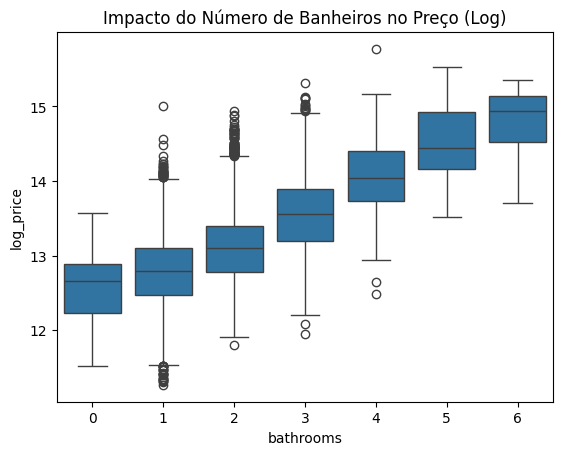

Frequência de Quartos e Banheiros:
    bedrooms  bathrooms  count
6          3          2   4762
5          3          1   4483
11         4          2   4375
1          2          1   2159
10         4          1   1298

Preferência por Porão:
       Porão  Proporção
0  Sem Porão   0.609531
1  Com Porão   0.390469

Distribuição por Tamanho do Terreno:
  Tamanho do Terreno  Proporção
0              Médio   0.820762
1             Grande   0.096264
2            Pequeno   0.082973

Distribuição de Qualidade e Condição:
    grade  condition  count
16      7          3   5116
21      8          3   4193
17      7          4   2787
25      9          3   2020
22      8          4   1353


In [88]:
# Frequência de Quartos e Banheiros
bed_bath = df_tranf.groupby(['bedrooms', 'bathrooms']).size().reset_index(name='count')
bed_bath = bed_bath.sort_values(by='count', ascending=False)

# Presença de Porão
df_tranf['has_basement'] = df_tranf['sqft_basement'].apply(lambda x: 'Com Porão' if x > 0 else 'Sem Porão')
basement_pref = df_tranf['has_basement'].value_counts(normalize=True).reset_index()
basement_pref.columns = ['Porão', 'Proporção']

# Classificar terrenos (usando log_sqft_lot)
min_lot = df_tranf['log_sqft_lot'].min()
max_lot = df_tranf['log_sqft_lot'].max()

bins = [min_lot, 8, 10, max_lot]  # Ajuste os limites com base na escala logarítmica
labels = ['Pequeno', 'Médio', 'Grande']

df_tranf['lot_size_category'] = pd.cut(df_tranf['log_sqft_lot'], bins=bins, labels=labels, include_lowest=True)
lot_pref = df_tranf['lot_size_category'].value_counts(normalize=True).reset_index()
lot_pref.columns = ['Tamanho do Terreno', 'Proporção']

# Qualidade da Vista
view_pref = df_tranf['view'].value_counts(normalize=True).reset_index()
view_pref.columns = ['Qualidade da Vista', 'Proporção']

# Condição e Qualidade
quality_pref = df_tranf.groupby(['grade', 'condition']).size().reset_index(name='count')
quality_pref = quality_pref.sort_values(by='count', ascending=False)

# Impacto no Preço
sns.boxplot(data=df_tranf, x='bedrooms', y='log_price')
plt.title("Impacto do Número de Quartos no Preço (Log)")
plt.show()

sns.boxplot(data=df_tranf, x='bathrooms', y='log_price')
plt.title("Impacto do Número de Banheiros no Preço (Log)")
plt.show()

# Exibir resultados
print("Frequência de Quartos e Banheiros:")
print(bed_bath.head())

print("\nPreferência por Porão:")
print(basement_pref)

print("\nDistribuição por Tamanho do Terreno:")
print(lot_pref)

print("\nDistribuição de Qualidade e Condição:")
print(quality_pref.head())


### **Análise**

Com base nos resultados fornecidos, podemos observar tendências claras nas preferências dos compradores de imóveis. As análises abrangem características essenciais, como número de quartos e banheiros, presença de porão, tamanho do terreno e qualidade/conservação do imóvel.

---

#### **1. Frequência de Quartos e Banheiros**
A combinação de **3 quartos e 2 banheiros** é a mais comum, representando o maior número de vendas (4762). Seguem-se as casas com **3 quartos e 1 banheiro** (4483) e **4 quartos e 2 banheiros** (4375). Isso reflete que os compradores preferem casas práticas e funcionais, que atendem a famílias médias. Casas com **2 quartos e 1 banheiro** aparecem em menor número (2159), sugerindo que são opções mais modestas, enquanto casas com **4 quartos e 1 banheiro** (1298) são menos desejadas, possivelmente devido à falta de banheiros suficientes para o tamanho do imóvel.

**Insights:**
- A configuração **3 quartos e 2 banheiros** parece ser o equilíbrio ideal entre espaço e funcionalidade.
- Casas com menos de 2 banheiros são menos populares em imóveis maiores (4 quartos), sugerindo que o número de banheiros deve ser proporcional ao tamanho da casa.

---

#### **2. Preferência por Porão**
A maioria dos compradores prefere imóveis **sem porão** (60,9%), enquanto apenas 39,1% optam por imóveis com porão. Isso pode refletir uma preferência por simplicidade e facilidade de manutenção. No entanto, a presença de porão ainda é valorizada por uma parcela significativa dos compradores, o que pode indicar que imóveis com porão atendem a nichos específicos, como famílias que precisam de mais espaço de armazenamento ou área útil adicional.

**Insights:**
- Imóveis sem porão são mais comuns e mais procurados no mercado geral.
- Porões podem ser um diferencial para nichos de mercado, mas não são uma prioridade para a maioria dos compradores.

---

#### **3. Distribuição por Tamanho do Terreno**
A análise do tamanho do terreno mostra que a maioria dos compradores prefere terrenos de tamanho **médio** (82,1%), enquanto terrenos grandes (9,6%) e pequenos (8,3%) têm menor demanda. Isso sugere que terrenos médios oferecem o equilíbrio ideal entre espaço e custo de manutenção. Terrenos grandes podem ser menos acessíveis devido ao preço mais alto, enquanto terrenos pequenos podem ser menos atrativos por oferecerem espaço limitado.

**Insights:**
- Terrenos médios são os mais desejados, provavelmente por atenderem às necessidades práticas dos compradores sem demandar altos custos de manutenção.
- Terrenos grandes são um mercado de nicho, enquanto terrenos pequenos podem atrair compradores de imóveis econômicos.

---

#### **4. Distribuição de Qualidade e Condição**
Imóveis com qualidade média-alta (`grade = 7` e `grade = 8`) e em boas condições (`condition = 3` ou `condition = 4`) são os mais vendidos. A configuração mais popular é de imóveis com qualidade `grade = 7` e condição `condition = 3` (5116), seguida de `grade = 8` e `condition = 3` (4193). Imóveis com qualidade superior (`grade = 9`) aparecem em menor número, indicando que o mercado é dominado por imóveis de qualidade intermediária.

**Insights:**
- Os compradores preferem imóveis de qualidade média-alta e em boas condições, que oferecem um bom equilíbrio entre custo e benefícios.
- Imóveis com qualidade muito alta (`grade = 9`) são menos comuns, sugerindo que pertencem a um segmento premium mais restrito.

---

### **Conclusão**
A análise revela que os compradores preferem imóveis que combinam funcionalidade, custo-benefício e praticidade:

1. **Configuração Ideal:** Casas com **3 quartos e 2 banheiros** são as mais procuradas.
2. **Sem Porão:** Imóveis sem porão são mais populares, embora a presença de porão atenda a um nicho relevante.
3. **Terreno Médio:** Terrenos médios são preferidos por oferecer o equilíbrio ideal entre espaço e custo de manutenção.
4. **Qualidade e Condição:** Imóveis com qualidade média-alta (`grade = 7 ou 8`) e em boas condições (`condition = 3 ou 4`) dominam o mercado, refletindo a busca por um bom custo-benefício.

Esses padrões sugerem um mercado imobiliário focado em atender as necessidades práticas de famílias médias, com espaço suficiente e qualidade adequada, mas sem luxo excessivo.

### O padrão de construção impacta mais o preço do que a condição do imóvel?

Correlação com o preço logarítmico:
log_price    1.000000
grade        0.700919
condition    0.034346
Name: log_price, dtype: float64


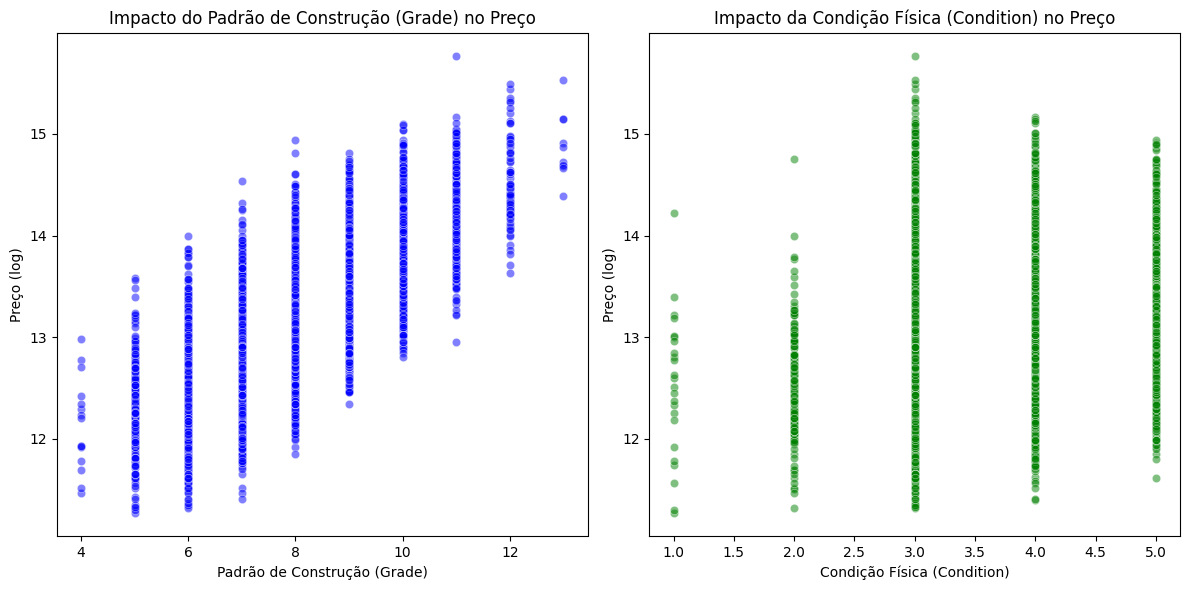

In [94]:
# Calcular correlações com log_price
correlacoes = df_tranf[['log_price', 'grade', 'condition']].corr()

# Exibir as correlações
print("Correlação com o preço logarítmico:")
print(correlacoes['log_price'])

plt.figure(figsize=(12, 6))

# Grade vs Preço
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_tranf, x='grade', y='log_price', alpha=0.5, color='blue')
plt.title('Impacto do Padrão de Construção (Grade) no Preço')
plt.xlabel('Padrão de Construção (Grade)')
plt.ylabel('Preço (log)')

# Condition vs Preço
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_tranf, x='condition', y='log_price', alpha=0.5, color='green')
plt.title('Impacto da Condição Física (Condition) no Preço')
plt.xlabel('Condição Física (Condition)')
plt.ylabel('Preço (log)')

plt.tight_layout()
plt.show()


A análise das correlações mostra que a **qualidade de construção (`grade`)** tem um impacto significativo no preço logarítmico, com uma correlação forte de **0.7009**. Isso indica que imóveis com padrões de construção superiores são muito mais valorizados no mercado.

Por outro lado, a **condição física (`condition`)** apresentou uma correlação fraca de **0.0343**, sugerindo que a condição atual do imóvel tem pouca influência direta no preço. Embora importante para a funcionalidade, ela não é um fator decisivo na valorização.

Em resumo, para agregar valor ao imóvel, o foco deve estar em melhorar a qualidade de construção, pois a condição física tem um impacto muito menor no mercado imobiliário.

In [47]:
# Salvar o DataFrame atualizado em um novo arquivo CSV
df_tranf.to_csv('kc_house_data_updat.csv', index=False)
